In [0]:
import pandas as pd

df = pd.read_csv("NewDataSet.csv")

In [16]:
df

,Profile Pic,Nums/Length Username,Full Name Words,Bio Length,External Url,Verified,Business,#Posts,#Followers,#Following,Last Post Recent,%Post Single Day,Index of Activity,Average of Likes,Fake,Profile Pic Url,Username
0,1,0.000,2,42,1,0,0,111,688,409,1,3.000,11.111,68.300,0,https://scontent-mia3-2.cdninstagram.com/v/t51...,matteo_cattani_
1,1,0.067,2,0,0,0,0,58,353,456,1,8.621,0.800,31.121,0,https://scontent-mia3-2.cdninstagram.com/v/t51...,gabrielebegani5
2,1,0.000,0,0,0,0,0,44,535,364,1,4.545,1.417,49.750,0,https://scontent-mia3-2.cdninstagram.com/v/t51...,mattelazzari
3,1,0.000,2,14,0,0,1,81,3109,298,1,1.235,0.833,160.556,0,https://scontent-mia3-2.cdninstagram.com/v/t51...,davidobrasil
4,1,0.000,2,0,0,0,1,498,1071,1999,1,2.000,5.333,95.400,0,https://scontent-mia3-2.cdninstagram.com/v/t51...,sofiazammarchi_
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,0.308,1,0,0,0,0,0,87,4609,0,0.000,0.000,0.000,1,https://scontent-atl3-1.cdninstagram.com/v/t51...,sardashti2233
996,1,0.000,3,75,0,0,0,1,103,159,0,100.000,0.000,0.000,1,https://scontent-atl3-1.cdninstagram.com/v/t51...,_mxnsterz_backup
997,1,0.000,1,0,0,0,0,0,88,322,0,0.000,0.000,0.000,1,https://scontent-atl3-1.cdninstagram.com/v/t51...,rezysmods
998,0,0.000,1,0,0,0,0,0,929,1315,0,0.000,0.000,0.000,1,https://instagram.ffru6-1.fna.fbcdn.net/v/t51....,cravinforti_


In [22]:
X = df.iloc[:, 0:14].values
X[0]

array([  1.   ,   0.   ,   2.   ,  42.   ,   1.   ,   0.   ,   0.   ,
       111.   , 688.   , 409.   ,   1.   ,   3.   ,  11.111,  68.3  ])

In [23]:
y = df.iloc[:,14].values
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [0]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

In [25]:
def printColumn(number):
  switcher = {
      0: "Profile Pic",
      1: "Nums/length Username",
      2: "Full Name Words",
      3: "Bio Length",
      4: "External URL",
      5: "Verified",
      6: "Business",
      7: "#Post",
      8: "#Followers",
      9: "#Following",
      10: "Last Post Recent",	
      11: "%Post Single Day",
      12:	"Index of Activity",
      13:	"Average of Likes"
  }
  return switcher.get(number, "Invalid Column")

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f) %s" % (f + 1, indices[f], importances[indices[f]], printColumn(indices[f])))

Feature ranking:
1. feature 10 (0.411631) Last Post Recent
2. feature 11 (0.117609) %Post Single Day
3. feature 9 (0.079988) #Following
4. feature 6 (0.077287) Business
5. feature 3 (0.056721) Bio Length
6. feature 4 (0.052116) External URL
7. feature 12 (0.039918) Index of Activity
8. feature 0 (0.026944) Profile Pic
9. feature 8 (0.026237) #Followers
10. feature 1 (0.025564) Nums/length Username
11. feature 2 (0.023435) Full Name Words
12. feature 13 (0.021763) Average of Likes
13. feature 7 (0.021278) #Post
14. feature 5 (0.019510) Verified


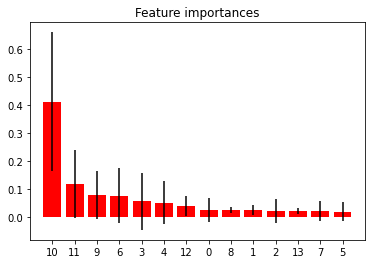

In [26]:
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()